In [1]:
%matplotlib inline
import sys
sys.path.append('..')

# Un vistazo a los datos
Vamos a cargar el vector de características.

In [2]:
from dns_attacks_detection import *

In [3]:
try:
    dns = joblib.load('../vectors/EntropyAndRatiosFV_3JUL.pkl')
except FileNotFoundError:
    dns = create_feature_vector_from_log_file('../logs/3JUL.log', extract_features_entropy_and_ratios)
    joblib.dump(dns, '../vectors/EntropyAndRatiosFV_3JUL.pkl')

In [4]:
dns.head()

,attack,chars,digits,entropy,longest_chars,longest_digits,longest_meaningful,symbols
0,0,1.0,0.0,0.528321,1.0,0.0,0.333333,0.0
1,0,1.0,0.0,0.430827,1.0,0.0,1.000000,0.0
2,0,1.0,0.0,0.528321,1.0,0.0,0.333333,0.0
3,0,1.0,0.0,0.000000,1.0,0.0,0.333333,0.0
4,0,1.0,0.0,0.327523,1.0,0.0,0.444444,0.0


In [5]:
dns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 8 columns):
attack                52610 non-null int64
chars                 52610 non-null float64
digits                52610 non-null float64
entropy               52610 non-null float64
longest_chars         52610 non-null float64
longest_digits        52610 non-null float64
longest_meaningful    52610 non-null float64
symbols               52610 non-null float64
dtypes: float64(7), int64(1)
memory usage: 3.2 MB


In [6]:
dns.describe()

,attack,chars,digits,entropy,longest_chars,longest_digits,longest_meaningful,symbols
count,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000
mean,0.050960,0.887117,0.111230,0.376470,0.875555,0.102316,0.606866,0.001654
std,0.219918,0.277083,0.277009,0.122499,0.291470,0.266150,0.304357,0.013217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.304012,1.000000,0.000000,0.428571,0.000000
50%,0.000000,1.000000,0.000000,0.375272,1.000000,0.000000,0.600000,0.000000
75%,0.000000,1.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.528321,1.000000,1.000000,1.000000,0.250000


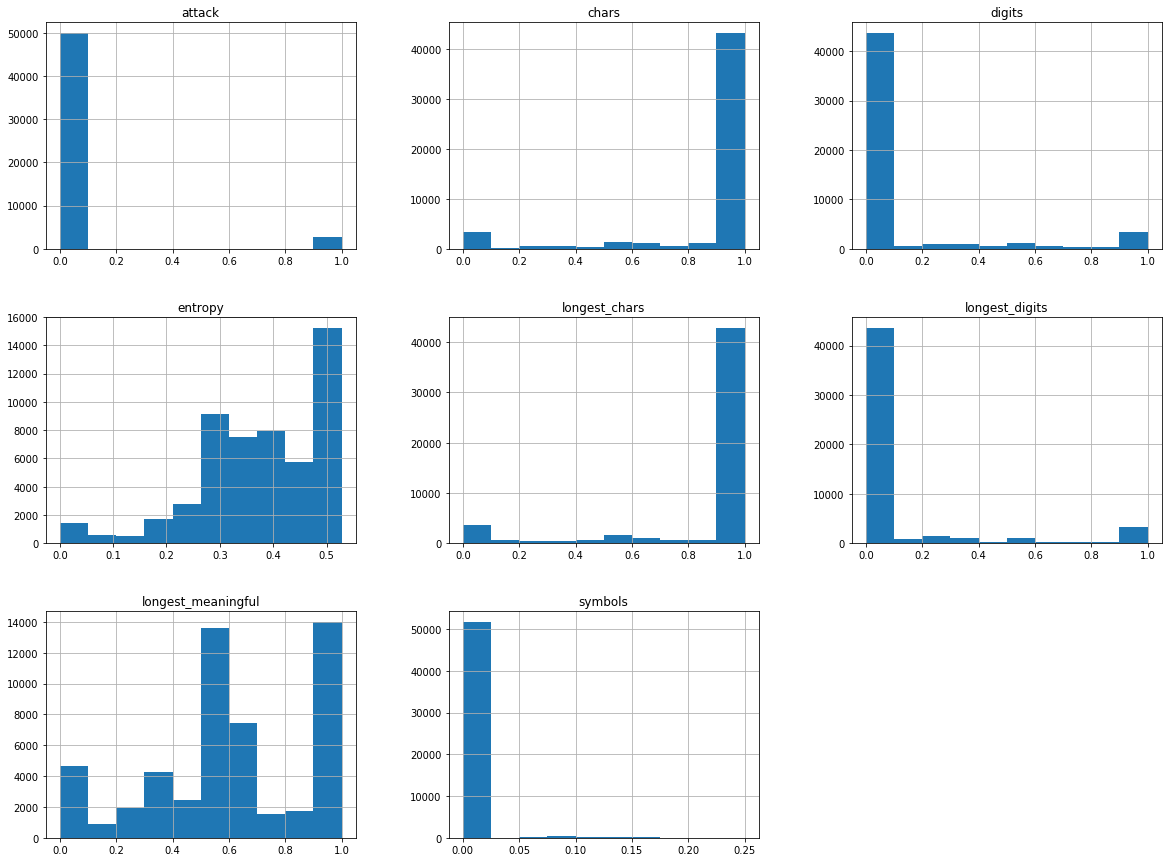

In [7]:
dns.hist(figsize=(20,15))
plt.show()

# Creación de un "test set"
Creación usando "stratified sampling" dependiendo si una consulta es un ataque o no.

In [8]:
train_set, test_set = split_train_and_test_sets(dns, 'attack')

In [9]:
train_set['attack'].value_counts() / len(train_set)

0    0.949035
1    0.050965
Name: attack, dtype: float64

In [10]:
test_set['attack'].value_counts() / len(test_set)

0    0.949059
1    0.050941
Name: attack, dtype: float64

El conjunto de entrenamiento y el conjunto de test tienen proporciones similares.

# Descubrir y visualizar los datos

In [11]:
train_set_copy = train_set.copy()

Buscando correlaciones: comprobemos si algún atributo se correlaciona con el atributo de ataque.

In [12]:
corr_matrix = train_set_copy.corr()
corr_matrix['attack'].sort_values(ascending=False)

attack                1.000000
digits                0.355623
longest_digits        0.241213
symbols              -0.029131
entropy              -0.303808
chars                -0.354139
longest_meaningful   -0.361716
longest_chars        -0.415943
Name: attack, dtype: float64

# Seleccionar y entrenar un modelo

In [13]:
features = train_set.drop('attack', 1)
features

,chars,digits,entropy,longest_chars,longest_digits,longest_meaningful,symbols
19038,1.000000,0.000000,0.500000,1.000000,0.000000,0.500000,0.0
34347,1.000000,0.000000,0.306099,1.000000,0.000000,0.666667,0.0
38293,1.000000,0.000000,0.464386,1.000000,0.000000,1.000000,0.0
15027,1.000000,0.000000,0.360234,1.000000,0.000000,0.857143,0.0
32646,1.000000,0.000000,0.319716,1.000000,0.000000,0.666667,0.0
18206,0.315789,0.684211,0.190334,0.157895,0.210526,0.052632,0.0
40710,1.000000,0.000000,0.319418,1.000000,0.000000,0.428571,0.0
47415,1.000000,0.000000,0.464386,1.000000,0.000000,1.000000,0.0
21099,1.000000,0.000000,0.264907,1.000000,0.000000,0.636364,0.0
10444,1.000000,0.000000,0.319716,1.000000,0.000000,0.500000,0.0


In [14]:
labels = train_set['attack']
labels

19038    0
34347    0
38293    0
15027    0
32646    0
18206    1
40710    0
47415    0
21099    0
10444    0
20086    0
46941    0
22703    1
27980    0
29957    0
21281    0
37689    0
35961    0
7664     1
23435    0
37630    0
35801    0
6023     0
7777     0
33452    0
20629    0
46080    0
3813     0
19759    0
2792     0
        ..
19146    0
45370    0
2599     0
9440     0
20665    0
40669    0
17967    0
21537    0
40308    0
41310    0
39340    0
26520    0
10041    0
3399     0
20828    0
21972    0
25180    0
26146    0
14883    0
32959    0
38584    0
14303    0
4482     0
19699    0
29817    0
38981    0
1251     0
29917    0
46138    0
18349    0
Name: attack, Length: 42088, dtype: int64

## Stochastic Gradient Descent (SGD) classifier

In [15]:
sgd_clf = SGDClassifier(max_iter=5, random_state=13)
sgd_clf.fit(features, labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=13, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
some_data = features[:10]
some_labels = labels[:10]
print("Predictions:", sgd_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.
"cross_val_predict" realiza "K-fold cross-validation" devolviendo las predicciones realizadas en cada "test fold".

In [17]:
train_predicted_labels = cross_val_predict(sgd_clf, features, labels, cv=5)

In [18]:
confusion_matrix(labels, train_predicted_labels)

array([[39888,    55],
       [ 1146,   999]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [19]:
precision_score(labels, train_predicted_labels)

0.94781783681214427

In [20]:
recall_score(labels, train_predicted_labels)

0.46573426573426574

In [21]:
f1_score(labels, train_predicted_labels)

0.6245701781806815

### Análisis

Obtengamos la puntuación que el clasificador SGD da a todas las predicciones.

In [22]:
labels_scores = cross_val_predict(sgd_clf, features, labels, cv=5, method='decision_function')

In [23]:
labels_scores

array([-2.421005  , -2.76682301, -4.23845264, ..., -3.13269997,
       -3.05839214, -4.58785726])

Las puntuaciones viven entre los valores -4.62 y 5.03:

In [24]:
labels_scores.min()

-4.6257375357713597

In [25]:
labels_scores.max()

5.0326899758766634

Tracemos la curva de precisión vs. exhaustividad.

In [26]:
precisions, recalls, thresholds = precision_recall_curve(labels, labels_scores)

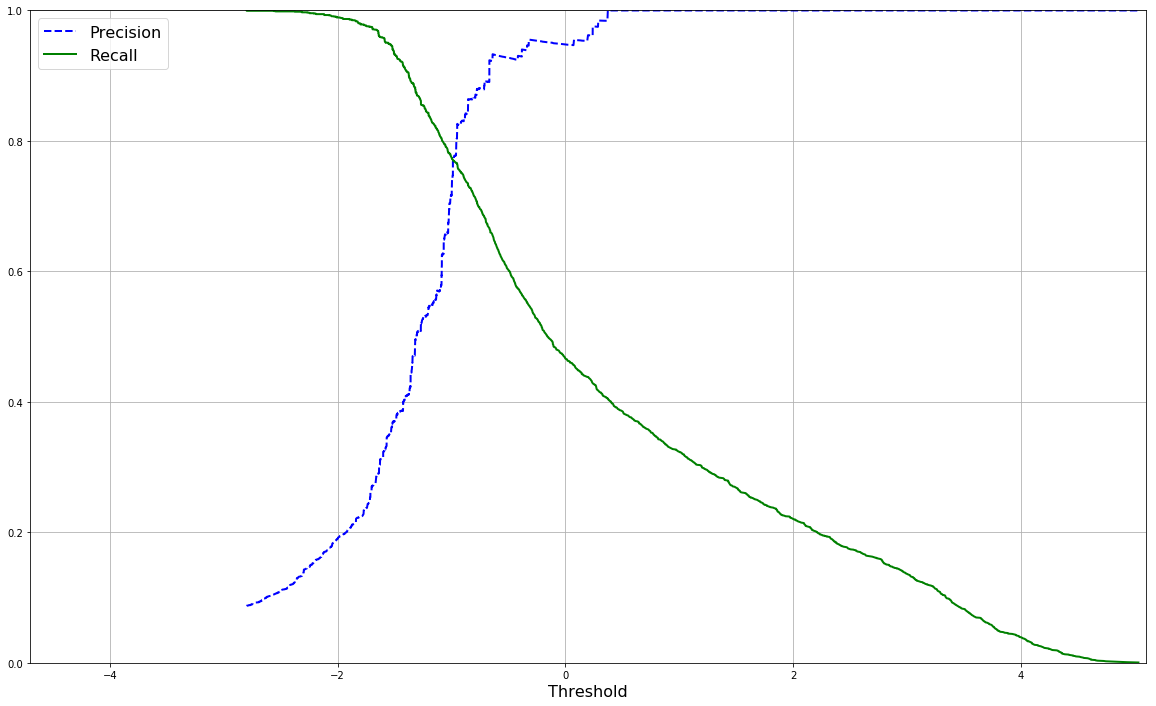

In [27]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-4.7, 5.1])
plt.show()

Con un valor cercano a -1 de umbral parece dar un resultado aceptable de precisión/exhaustividad:

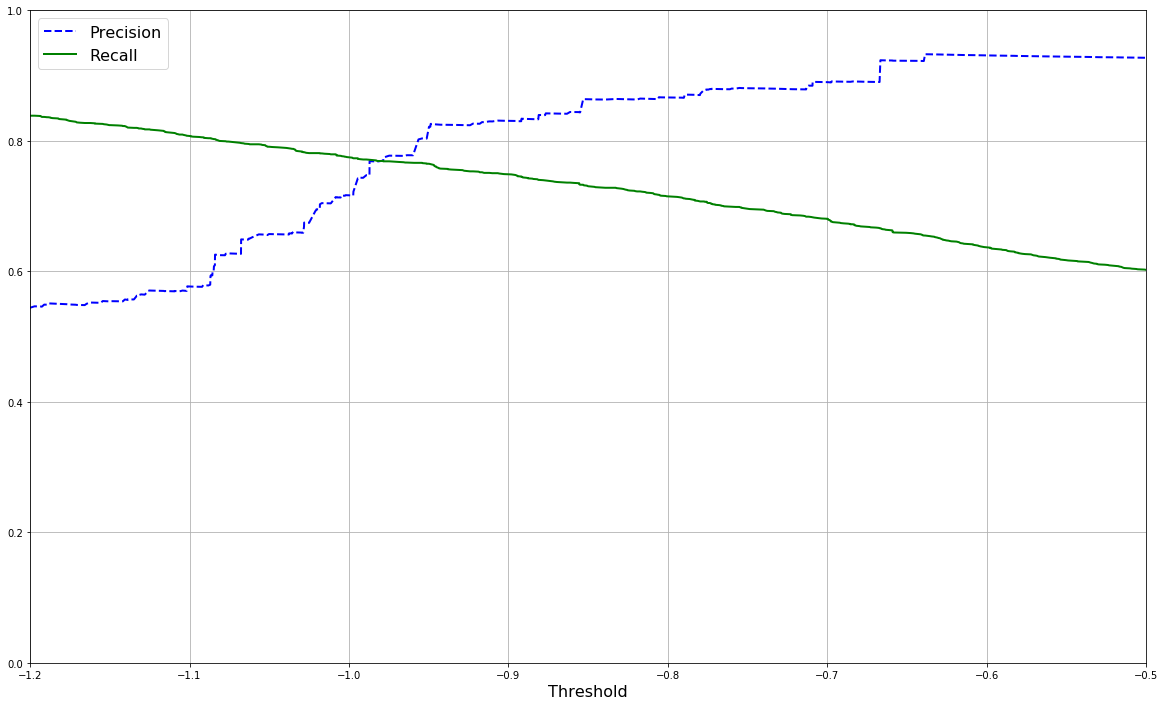

In [28]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1.2, -0.5])
plt.show()

Comprobamos los valores de precisión y exhaustividad ajustando el umbral a -0.98:

In [29]:
labels_train_pred_70 = (labels_scores > -0.98)

In [30]:
confusion_matrix(labels, labels_train_pred_70)

array([[39450,   493],
       [  495,  1650]])

In [31]:
precision_score(labels, labels_train_pred_70)

0.76994867008866075

In [32]:
recall_score(labels, labels_train_pred_70)

0.76923076923076927

In [33]:
f1_score(labels, labels_train_pred_70)

0.76958955223880599

## Logistic Regression classifier

In [34]:
log_reg_clf = LogisticRegression(random_state=13, solver='liblinear')
log_reg_clf.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
print("Predictions:", log_reg_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [36]:
train_predicted_labels = cross_val_predict(log_reg_clf, features, labels, cv=5)

In [37]:
confusion_matrix(labels, train_predicted_labels)

array([[39790,   153],
       [  869,  1276]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [38]:
precision_score(labels, train_predicted_labels)

0.8929321203638908

In [39]:
recall_score(labels, train_predicted_labels)

0.59487179487179487

In [40]:
f1_score(labels, train_predicted_labels)

0.71404588696138771

### Análisis

Para poder representar gráficamente cómo actúa el modelo y analizarlo más fácilmente, dejemos sólo dos características: longest_chars y entropy.

In [41]:
reduced_features = features.drop(['chars', 'digits', 'symbols', 'longest_digits', 'longest_meaningful'], 1)
train_predicted_labels = cross_val_predict(log_reg_clf, reduced_features, labels, cv=5)

In [42]:
confusion_matrix(labels, train_predicted_labels)

array([[39682,   261],
       [ 1324,   821]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [43]:
precision_score(labels, train_predicted_labels)

0.75878003696857665

In [44]:
recall_score(labels, train_predicted_labels)

0.38275058275058277

In [45]:
f1_score(labels, train_predicted_labels)

0.50883173225906408

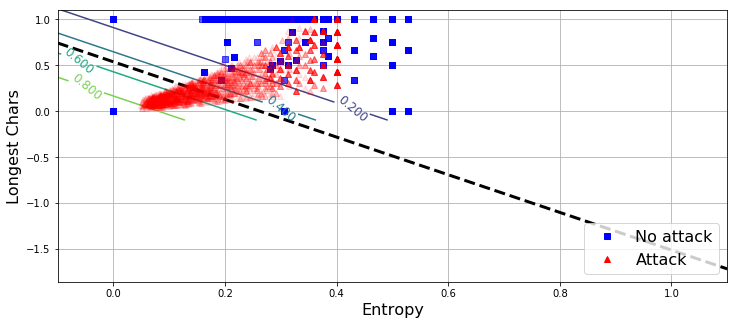

In [46]:
log_reg_clf.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_logistic_regression(log_reg_clf, [-0.1, 1.1, -0.1, 1.1])

X = reduced_features.values
y = labels.values

plot_dataset(X, y, "Entropy", "Longest Chars")

plt.show()

## Support Vector Machines

* ## Con Polynomial Kernel

In [47]:
svm_clf_poly = SVC(kernel='poly', random_state=13, gamma='auto', degree=3, coef0=1, C=5)
svm_clf_poly.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
print("Predictions:", svm_clf_poly.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [49]:
train_predicted_labels = cross_val_predict(svm_clf_poly, features, labels, cv=5)

In [50]:
confusion_matrix(labels, train_predicted_labels)

array([[39792,   151],
       [  226,  1919]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [51]:
precision_score(labels, train_predicted_labels)

0.92705314009661832

In [52]:
recall_score(labels, train_predicted_labels)

0.89463869463869461

In [53]:
f1_score(labels, train_predicted_labels)

0.91055753262158956

### Análisis

Volvamos a usar el vector que tiene sólo las dos características para facilitar el análisis.

In [54]:
train_predicted_labels = cross_val_predict(svm_clf_poly, reduced_features, labels, cv=5)

In [55]:
confusion_matrix(labels, train_predicted_labels)

array([[39159,   784],
       [  559,  1586]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [56]:
precision_score(labels, train_predicted_labels)

0.6691983122362869

In [57]:
recall_score(labels, train_predicted_labels)

0.73939393939393938

In [58]:
f1_score(labels, train_predicted_labels)

0.70254706533776301

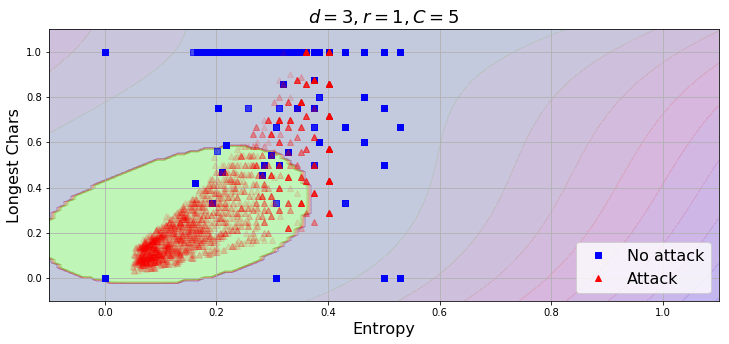

In [59]:
svm_clf_poly.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_poly, [-0.1, 1.1, -0.1, 1.1]) 

plot_dataset(X, y, "Entropy", "Longest Chars")

plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.show()

Aumento del grado de la función polinómica del kernel y la penalización por error:

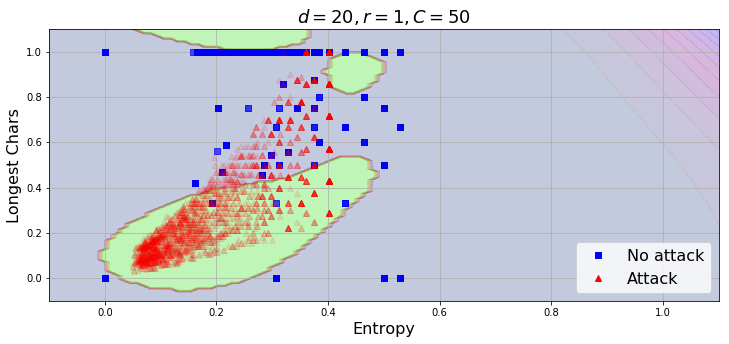

In [60]:
svm_clf_poly = SVC(kernel='poly', random_state=13, gamma='auto', degree=20, coef0=1, C=50)
svm_clf_poly.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_poly, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Entropy", "Longest Chars")

plt.title(r"$d=20, r=1, C=50$", fontsize=18)

plt.show()

* ## Con Gaussian RBF Kernel

In [61]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13, gamma=5, C=5)
svm_clf_rbf.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
print("Predictions:", svm_clf_rbf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [63]:
train_predicted_labels = cross_val_predict(svm_clf_rbf, features, labels, cv=5)

In [64]:
confusion_matrix(labels, train_predicted_labels)

array([[39941,     2],
       [  108,  2037]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [65]:
precision_score(labels, train_predicted_labels)

0.99901912702305051

In [66]:
recall_score(labels, train_predicted_labels)

0.94965034965034967

In [67]:
f1_score(labels, train_predicted_labels)

0.97370936902485672

### Análisis

Usemos de nuevo el vector con las características reducidas para la representación gráfica.

In [68]:
train_predicted_labels = cross_val_predict(svm_clf_rbf, reduced_features, labels, cv=5)

In [69]:
confusion_matrix(labels, train_predicted_labels)

array([[39871,    72],
       [  666,  1479]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [70]:
precision_score(labels, train_predicted_labels)

0.95357833655705992

In [71]:
recall_score(labels, train_predicted_labels)

0.68951048951048954

In [72]:
f1_score(labels, train_predicted_labels)

0.80032467532467533

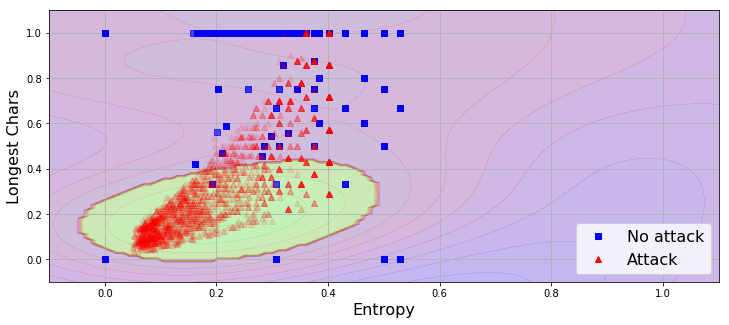

In [73]:
svm_clf_rbf.fit(reduced_features, labels)
plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_rbf, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Entropy", "Longest Chars")

plt.show()

## Decision Trees

In [74]:
tree_clf = DecisionTreeClassifier(random_state=13)
tree_clf.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [75]:
print("Predictions:", tree_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [76]:
train_predicted_labels = cross_val_predict(tree_clf, features, labels, cv=5)

In [77]:
confusion_matrix(labels, train_predicted_labels)

array([[39931,    12],
       [   51,  2094]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [78]:
precision_score(labels, train_predicted_labels)

0.99430199430199429

In [79]:
recall_score(labels, train_predicted_labels)

0.97622377622377621

In [80]:
f1_score(labels, train_predicted_labels)

0.98517995765702182

### Análisis

In [81]:
export_graphviz(
        tree_clf,
        out_file='../images/tree_clf_dns_entropy.dot',
        feature_names=features.columns,
        class_names=['No attack', 'Attack'],
        rounded=True,
        filled=True
    )

![tree_clf_dns.png](../images/tree_clf_dns_entropy.png "Árbol de decisión")

## K-Nearest-Neighbors

In [82]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
print("Predictions:", knn_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [84]:
train_predicted_labels = cross_val_predict(knn_clf, features, labels, cv=5)

In [85]:
confusion_matrix(labels, train_predicted_labels)

array([[39931,    12],
       [   56,  2089]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [86]:
precision_score(labels, train_predicted_labels)

0.99428843407901002

In [87]:
recall_score(labels, train_predicted_labels)

0.97389277389277384

In [88]:
f1_score(labels, train_predicted_labels)

0.98398492699010842

### Análisis

Hagamos una representación gráfica usando el vector con características reducidas.

In [89]:
train_predicted_labels = cross_val_predict(knn_clf, reduced_features, labels, cv=5)

In [90]:
confusion_matrix(labels, train_predicted_labels)

array([[39935,     8],
       [  151,  1994]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [91]:
precision_score(labels, train_predicted_labels)

0.99600399600399603

In [92]:
recall_score(labels, train_predicted_labels)

0.92960372960372961

In [93]:
f1_score(labels, train_predicted_labels)

0.96165903062454772

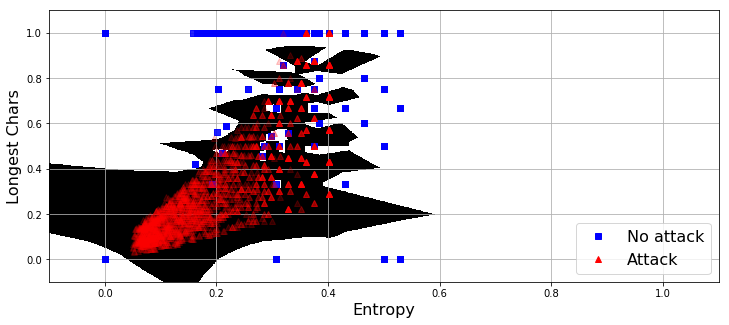

In [94]:
knn_clf_red = KNeighborsClassifier()
knn_clf_red.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_KNN(knn_clf_red, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Entropy", "Longest Chars", 0.2)

plt.show()

# Afinación de Modelos

## Support Vector Machines (Gaussian RBF Kernel)

### Randomized Search

In [95]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13)
param_distribs = {
        'gamma': randint(low=1, high=100),
        'C': randint(low=1, high=500),
    }
svm_clf_rbf_rnd_search = RandomizedSearchCV(svm_clf_rbf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=13, return_train_score=False)
svm_clf_rbf_rnd_search.fit(features, labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=13,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd6d12394a8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd6d1239d68>},
          pre_dispatch='2*n_jobs', random_state=13, refit=True,
          return_train_score=False, scoring='recall', verbose=0)

In [96]:
search_results = svm_clf_rbf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.977622311162 {'C': 339, 'gamma': 49}
0.959906793137 {'C': 75, 'gamma': 17}
0.978088533781 {'C': 231, 'gamma': 99}
0.977622311162 {'C': 245, 'gamma': 26}
0.977622311162 {'C': 237, 'gamma': 59}
0.976223643302 {'C': 484, 'gamma': 27}
0.977622311162 {'C': 245, 'gamma': 67}
0.977622311162 {'C': 431, 'gamma': 55}
0.977622311162 {'C': 230, 'gamma': 78}
0.977622311162 {'C': 75, 'gamma': 74}


A partir de estos datos, al realizar el "Grid Search" nos centraremos en los valores de "C" y "gamma" más bajos, para evitar el sobreajuste ("overfitting").

### Grid Search

In [97]:
param_grid = {'C': [10, 20, 30, 50], 'gamma': [1, 10, 20, 50]}
svm_clf_rbf_grid_search = GridSearchCV(svm_clf_rbf, param_grid, cv=5, scoring='recall', return_train_score=False)
svm_clf_rbf_grid_search.fit(features, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=13,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [10, 20, 30, 50], 'gamma': [1, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='recall', verbose=0)

In [98]:
search_results = svm_clf_rbf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.941258663721 {'C': 10, 'gamma': 1}
0.957575901574 {'C': 10, 'gamma': 10}
0.960839182993 {'C': 10, 'gamma': 20}
0.977622311162 {'C': 10, 'gamma': 50}
0.941258719105 {'C': 20, 'gamma': 1}
0.957109678954 {'C': 20, 'gamma': 10}
0.959440625901 {'C': 20, 'gamma': 20}
0.977622311162 {'C': 20, 'gamma': 50}
0.941258774489 {'C': 30, 'gamma': 1}
0.958042124194 {'C': 30, 'gamma': 10}
0.958974403282 {'C': 30, 'gamma': 20}
0.977622311162 {'C': 30, 'gamma': 50}
0.942657276197 {'C': 50, 'gamma': 1}
0.958508346814 {'C': 50, 'gamma': 10}
0.958974403282 {'C': 50, 'gamma': 20}
0.977622311162 {'C': 50, 'gamma': 50}


Los valores de C=10 y gamma=10 parecen dar un resultado aceptable.

## Decision Trees

### Randomized Search

In [99]:
param_distribs = {
        'max_depth': randint(low=5, high=10),
        'min_samples_split': randint(low=12, high=25),
        'min_samples_leaf': randint(low=3, high=8)
    }
tree_clf_rnd_search = RandomizedSearchCV(tree_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=13, return_train_score=False)
tree_clf_rnd_search.fit(features, labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd6d11f2400>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd6d11f2da0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd6d11f2390>},
          pre_dispatch='2*n_jobs', random_state=13, refit=True,
          return_train_score=False, scoring='recall', verbose=0)

In [100]:
search_results = tree_clf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.973426750655 {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 22}
0.928204818055 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 16}
0.951981451673 {'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 22}
0.973426750655 {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 16}
0.972960528036 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 21}
0.972960528036 {'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 14}
0.928204818055 {'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 17}
0.973426750655 {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 18}
0.972960472652 {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 14}
0.927738595435 {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 23}


Al añadir estos parámetros al árbol de decisión nos encontramos con valores más bajos de exahustividad que cuando el modelo no tenía parámetros. Es muy probable que el modelo sin parámetros estuviera sobreajustado, debido al propio funcionamiento del modelo. Si un árbol de decisión se deja sin restricciones, éste tenderá a ajustarse a los datos, adaptándose a ellos de forma muy cercana. Por lo tanto, hay muchas posibilidades de que un árbol de decisión sin restricciones estará sobreajustado.
Debido a esto, añadiremos algunos parámetros a nuestro árbol para que pueda generalizar más con nuevos conjuntos de datos.

### Grid Search

In [101]:
param_grid = {'max_depth': [7], 'min_samples_leaf': [2, 4, 5], 'min_samples_split': [12, 14, 18]}
tree_clf_grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='recall', return_train_score=False)
tree_clf_grid_search.fit(features, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [7], 'min_samples_leaf': [2, 4, 5], 'min_samples_split': [12, 14, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='recall', verbose=0)

In [102]:
search_results = tree_clf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.973426639887 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 12}
0.973426639887 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 14}
0.974359085127 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 18}
0.972494250032 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.972494250032 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 14}
0.973426695271 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 18}
0.972960528036 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 12}
0.972960528036 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 14}
0.972960528036 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 18}


El resultado son valores bastante similares de exahustividad. Para que el árbol de decisión generalice lo máximo posible, trataremos de maximizar los parámetros "min_\*" y minimizar los parámetros "max_\*".

## K-Nearest-Neighbors

### Randomized Search

In [103]:
param_distribs = {
        'n_neighbors': randint(low=1, high=50),
        'weights': ['distance']
    }
knn_clf_rnd_search = RandomizedSearchCV(knn_clf, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='recall', random_state=13, return_train_score=False)
knn_clf_rnd_search.fit(features, labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd6d1212a20>, 'weights': ['distance']},
          pre_dispatch='2*n_jobs', random_state=13, refit=True,
          return_train_score=False, scoring='recall', verbose=0)

In [104]:
search_results = knn_clf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.971095526788 {'n_neighbors': 19, 'weights': 'distance'}
0.970163136933 {'n_neighbors': 49, 'weights': 'distance'}
0.97202786126 {'n_neighbors': 11, 'weights': 'distance'}
0.971095526788 {'n_neighbors': 17, 'weights': 'distance'}
0.970163136933 {'n_neighbors': 39, 'weights': 'distance'}


Usando el parámetro "distance" cambiamos el peso usado en la predicción. El peso por defecto es uniforme, por lo que cada vecino tiene el mismo peso. Al hacer este cambio, el peso de un vecino es calculado con la inversa de su distancia. Por lo tanto, los vecinos más cercanos tendrán más peso.

### Grid Search

In [105]:
param_grid = {'n_neighbors': [3, 7, 15], 'weights': ['uniform', 'distance']}
knn_clf_grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='recall', return_train_score=False)
knn_clf_grid_search.fit(features, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 7, 15], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='recall', verbose=0)

In [106]:
search_results = knn_clf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.974825086211 {'n_neighbors': 3, 'weights': 'uniform'}
0.974825086211 {'n_neighbors': 3, 'weights': 'distance'}
0.972027916644 {'n_neighbors': 7, 'weights': 'uniform'}
0.973426529119 {'n_neighbors': 7, 'weights': 'distance'}
0.965967244123 {'n_neighbors': 15, 'weights': 'uniform'}
0.972027972028 {'n_neighbors': 15, 'weights': 'distance'}


No parece haber una gran variación en la exhaustividad, trataremos de adoptar un valor de número de vecinos intermedio para evitar el sobreajuste o el subajuste.

# Ensemble Learning

Debido a que ya hemos estrechado nuestras opciones con respecto a qué modelos usar y hemos ajustado los modelos más prometedores, ahora podemos probar a combinar varios modelos para ver si al ser usados conjuntamente, aumenta su rendimiento.

## Modelos Elegidos

Elegiremos los modelos con los siguientes parámetros:
- Support Vector Machines (Gaussian RBF Kernel): {'C': 10, 'gamma': 10}. Exhaustividad: 0.95.
- Decision Trees: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 14}. Exhaustividad: 0.97.
- K-Nearest-Neighbors: parámetros por defecto ({'n_neighbors': 5, 'weights': 'uniform'}). Exhaustividad: 0.97.

In [107]:
svm_clf_rbf_tuned = SVC(kernel='rbf', random_state=13, gamma=10, C=10)
svm_clf_rbf_tuned.fit(features, labels)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
tree_clf_tuned = DecisionTreeClassifier(random_state=13, max_depth=7, min_samples_leaf=4, min_samples_split=14)
tree_clf_tuned.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=14,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [109]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Voting Classifiers

Usa la técnica de agregar las predicciones de diferentes clasificadores seleccionando la clase que obtiene más votos.

### SVM + Decision Tree + KNN

In [110]:
voting_clf_s_d_k = VotingClassifier(
    estimators=[('svm', svm_clf_rbf_tuned), ('dt', tree_clf_tuned), ('knn', knn_clf)], voting='hard')
voting_clf_s_d_k.fit(features, labels)

VotingClassifier(estimators=[('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [111]:
train_predicted_labels = cross_val_predict(voting_clf_s_d_k, features, labels, cv=5)

In [112]:
confusion_matrix(labels, train_predicted_labels)

array([[39931,    12],
       [   58,  2087]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [113]:
precision_score(labels, train_predicted_labels)

0.99428299190090519

In [114]:
recall_score(labels, train_predicted_labels)

0.97296037296037297

In [115]:
f1_score(labels, train_predicted_labels)

0.98350612629594725

### Decision Tree + KNN

In [116]:
voting_clf_d_k = VotingClassifier(
    estimators=[('dt', tree_clf_tuned), ('knn', knn_clf)], voting='soft')
voting_clf_d_k.fit(features, labels)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=14,
            min_weight_fraction_leaf=0...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [117]:
train_predicted_labels = cross_val_predict(voting_clf_d_k, features, labels, cv=5)

In [118]:
confusion_matrix(labels, train_predicted_labels)

array([[39931,    12],
       [   56,  2089]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [119]:
precision_score(labels, train_predicted_labels)

0.99428843407901002

In [120]:
recall_score(labels, train_predicted_labels)

0.97389277389277384

In [121]:
f1_score(labels, train_predicted_labels)

0.98398492699010842

## Random Forests

La técnica anterior se sirve de varios algoritmos para realizar predicciones, utilizando el mismo conjunto de datos de aprendizaje. Otras técnicas de "ensemble learning" son "bagging" y "pasting". Éstas consisten en entrenar el mismo algoritmo pero con distintos subconjuntos de los datos de entrenamiento.

"Bagging" y "pasting" permiten que las instancias de entrenamiento sean usadas varias veces por diferentes predictores, pero solo "bagging" permite que una instancia sea usada varias veces por el mismo predictor. Son usadas mayormente con árboles de decisión, aunque se pueden usar con cualquier tipo de modelo. En este caso usaremos árboles de decisión creando el enfoque llamado "random forests".

In [122]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
rnd_clf.fit(features, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [123]:
train_predicted_labels = cross_val_predict(rnd_clf, features, labels, cv=5)

In [124]:
confusion_matrix(labels, train_predicted_labels)

array([[39943,     0],
       [  116,  2029]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [125]:
precision_score(labels, train_predicted_labels)

1.0

In [126]:
recall_score(labels, train_predicted_labels)

0.94592074592074593

In [127]:
f1_score(labels, train_predicted_labels)

0.97220891231432682

## Extremely Randomized Trees

Una técnica muy similar a "random forests" pero añade más aleatoriedad ya que la elección de los umbrales para cada característica se realiza de forma aleatoria.

In [128]:
extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
extra_clf.fit(features, labels)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=13, verbose=0, warm_start=False)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [129]:
train_predicted_labels = cross_val_predict(extra_clf, features, labels, cv=5)

In [130]:
confusion_matrix(labels, train_predicted_labels)

array([[39932,    11],
       [  153,  1992]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [131]:
precision_score(labels, train_predicted_labels)

0.99450823764353469

In [132]:
recall_score(labels, train_predicted_labels)

0.92867132867132862

In [133]:
f1_score(labels, train_predicted_labels)

0.9604628736740598

# Evaluar los Modelos con el "Test Set"

Después de probar varios modelos, seleccionar los mejores, ajustarlos y comprobar cómo funcionan cuando son combinados, podemos analizar su rendimiento usando el conjunto de datos que apartamos al principio como "test set". Los modelos nunca han visto esos datos, por lo tanto podemos ver como reaccionan con nuevos datos.

In [134]:
features_test = test_set.drop('attack', 1)

In [135]:
labels_test = test_set['attack']

## Support Vector Machines (Gaussian RBF Kernel)

In [136]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    svm_clf_rbf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.998065764023 
Recall:  0.962686567164 
F1:  0.980056980057


## Decision Trees

In [137]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    tree_clf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.992409867173 
Recall:  0.975746268657 
F1:  0.98400752587


## K-Nearest-Neighbors

In [138]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    knn_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.992424242424 
Recall:  0.977611940299 
F1:  0.984962406015


## SVM + Decision Tree + KNN

In [139]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    voting_clf_s_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.992424242424 
Recall:  0.977611940299 
F1:  0.984962406015


## Decision Tree + KNN

In [140]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    voting_clf_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.992424242424 
Recall:  0.977611940299 
F1:  0.984962406015


## Random Forests

In [141]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    rnd_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  1.0 
Recall:  0.94776119403 
F1:  0.973180076628


## Extremely Randomized Trees

In [142]:
final_precision, final_recall, final_f1 = evaluate_model_with_precision_and_recall(
    extra_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1)

Precision:  0.994047619048 
Recall:  0.934701492537 
F1:  0.963461538462


In [143]:
directory = '../models/extract_features_entropy_and_ratios/'
joblib.dump(voting_clf_d_k, directory + 'decision_trees+knn.pkl')
joblib.dump(extra_clf, directory + 'extremely_randomized_trees.pkl')
joblib.dump(knn_clf, directory + 'knn.pkl')
joblib.dump(rnd_clf, directory + 'random_forests.pkl')

['../models/extract_features_entropy_and_ratios/random_forests.pkl']